In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import importlib
from scipy import stats

In [2]:
import utils
def run_extremes(N, W, pmf_cust, pmf_serv, gurobi_flag = 0):
    Ex = round (np.sum(np.outer(pmf_cust,pmf_serv)*W), 3) 
    #print("Expected cost for c = 0 case:", Ex )
    if gurobi_flag == 1:
        fluid_sol = utils.fluid_solution_gurobi(N, W, pmf_cust, pmf_serv)
    else:
        fluid_sol = utils.fluid_solution(N, W, pmf_cust, pmf_serv,0)
#     print("\nFluid Solution:\n")
#     print(fluid_sol)
    return([Ex,fluid_sol])
def plot_from_sim_paths(file_name, save_file= 0, frac = 0):
    with open(file_name,'rb') as f:
        C_paths_M, Q_paths_M, average_cost_B, average_queue_B, average_new, N, W, pmf_cust, pmf_serv = pickle.load(f)
    (average_cost_M, average_queue_M) = utils.average_paths(C_paths_M,Q_paths_M, frac)
    # (average_cost_B, average_queue_B) = utils.average_paths(C_paths_B,Q_paths_B, frac)
    [Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
    utils.qc_plot(Ex,fluid_sol,average_queue_B,average_new,average_queue_M,average_cost_M, save_file)

PMFs
[0.3 0.7] [0.9 0.1]
average cost B [4.03090015 1.22324946 1.09553739 1.02326535 1.01534561 1.00099004
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.        ]
0.9999999994163365


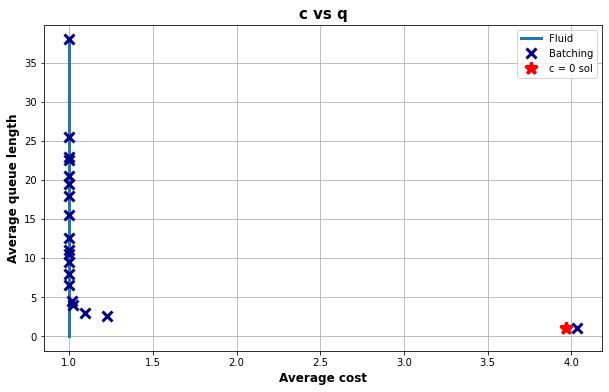

In [3]:
file_name = '../fc_2_39_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.27975958  0.38367952] [0.02632494]


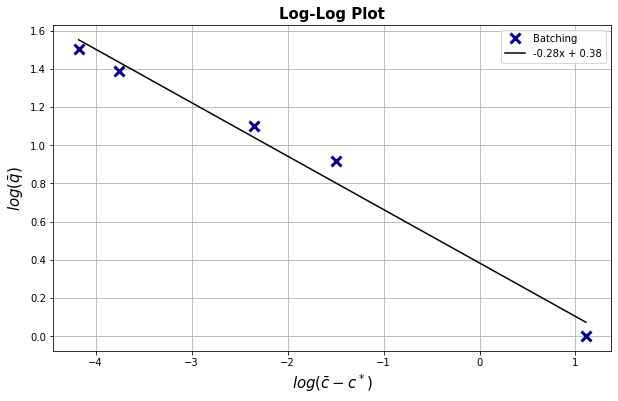

In [5]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.4 0.6] [0.4 0.6]
average cost B [24.7195286  14.19795396 13.04315608 11.05657085 10.50438018  8.92477199
  8.03709593  7.36130861  7.14405941  6.86525855  6.68282731  5.94257426
  5.45967798  5.2200016   5.46975395  5.10148515  5.03217822  4.89018755
  3.93657914]
1.0000000000188318


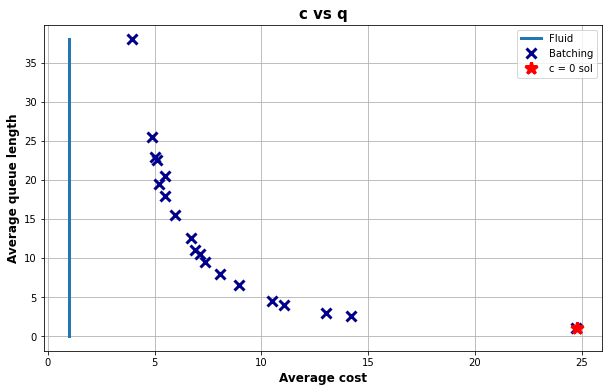

In [6]:
file_name = '../fc_2_44_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-1.81123133  5.63122617] [0.04645802]


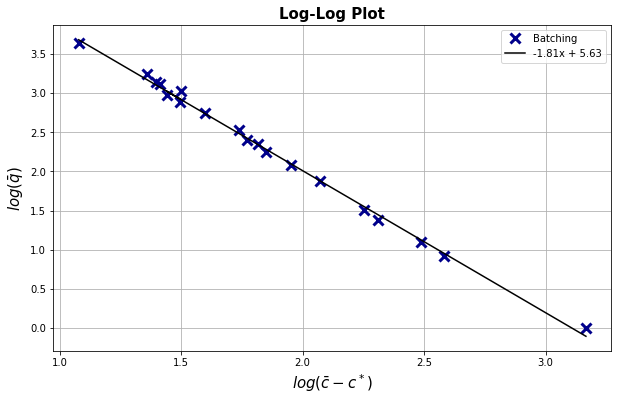

In [7]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.7 0.3] [0.7 0.3]
average cost B [21.57824289 13.14358287 11.95412885 10.38138072  9.82372795  8.35450918
  7.6559364   7.13657637  6.70594059  6.50833321  6.25859534  5.60148515
  5.24087704  5.12792884  5.13605721  4.83267327  4.66683168  4.52676669
  3.98015004]
1.0000000000370561


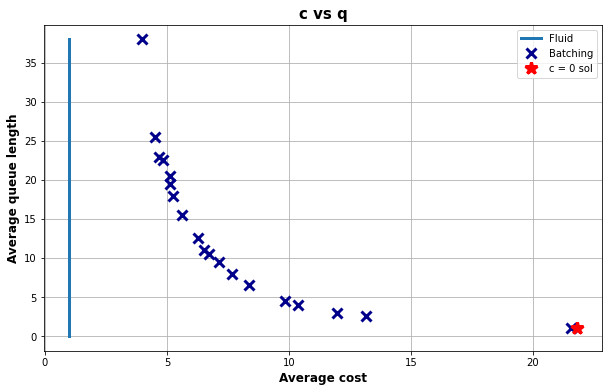

In [8]:
file_name = '../fc_2_77_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-1.88264992  5.63374422] [0.02020297]


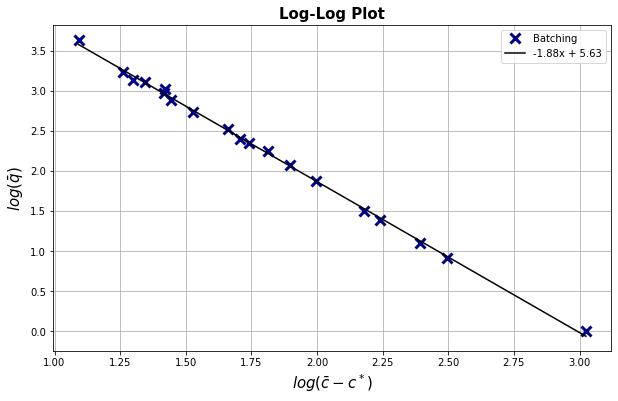

In [9]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])

PMFs
[0.8 0.2] [0.2 0.8]
average cost B [64.4603073  60.56206624 60.67720693 60.36327045 60.1400156  60.60186907
 60.23714093 60.42088921 60.32029703 60.55257197 60.29693688 60.49950495
 60.48860943 60.54236627 60.36435287 60.42128713 60.60940594 60.42327082
 60.44258065]
60.39999995102259


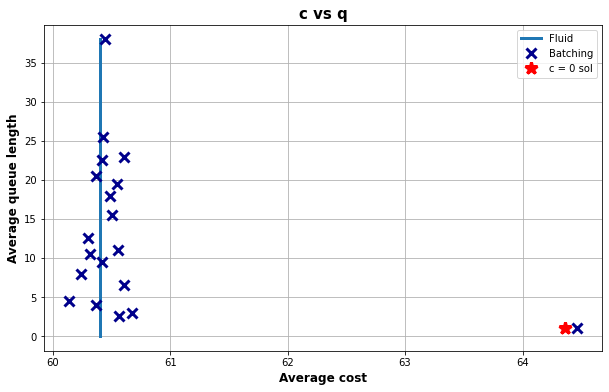

In [10]:
file_name = '../fc_2_82_batch.pkl'
with open(file_name,'rb') as f:
    C_paths_M, Q_paths_M, C_paths_B, Q_paths_B, N, W, pmf_cust, pmf_serv = pickle.load(f)
print("PMFs")
print(pmf_cust,pmf_serv)
Q_paths_B = np.transpose( np.asarray( Q_paths_B )  )
C_paths_B = np.transpose( np.asarray( C_paths_B ) )
average_cost_B = np.sum(C_paths_B,axis=0)/(Q_paths_B.shape[0] - Q_paths_B[-1,:])
average_queue_B = np.average(Q_paths_B,axis = 0)
print("average cost B", average_cost_B)

[Ex,fluid_sol] = run_extremes(N,W,pmf_cust,pmf_serv)
Cstar_rand = fluid_sol['Cost']
print(Cstar_rand)

ylim = max( average_queue_B )
plt.figure( figsize=(10,6) )
plt.plot([fluid_sol['Cost'],fluid_sol['Cost']],[0,ylim],linewidth = 3)
# Batching data
plt.plot(average_cost_B,average_queue_B,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
# Max Weight data
#plt.plot(avg_C_M, avg_Q_M,'go',markersize = 8)
plt.plot([Ex],[1],'r*',markersize = 12, markeredgewidth=3)
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.legend(['Fluid', 'Batching', 'c = 0 sol'])
# plt.legend([ 'Batching', 'Max-weight', 'c = 0 sol'])
plt.grid(True)

[-0.57342404  1.09013762] [6.03621178]


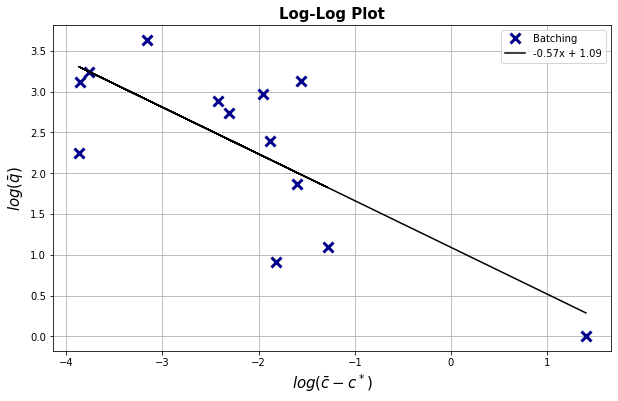

In [11]:
# Polynomial fit
deg = 1
# xM2 = np.log(average_cost_M_sc[1:10]-Cstar)
# yM2 = np.log(average_queue_M_sc[1:10])
beg = 0
end = len(average_cost_B) - 7
# xB2 = np.log(average_cost_B[beg:end]-Cstar_rand)
# yB2 = np.log(average_queue_B[beg:end])
xB2 = np.log(average_cost_B[average_cost_B>Cstar_rand+0.01]-Cstar_rand)
yB2 = np.log(average_queue_B[average_cost_B>Cstar_rand+0.01])



plt.figure( figsize=(10,6) )
plt.ylabel("Average queue length", weight='bold',fontsize=12)
plt.xlabel("Average cost", weight='bold',fontsize=12)
plt.title("c vs q", weight='bold',fontsize=15)
plt.grid(True)
plt.plot(xB2, yB2,'x',markersize = 10, markeredgewidth=3, markeredgecolor="darkblue")
pB, resB, _, _, _ = np.polyfit(xB2, yB2, 1, full=True)
print(pB,resB)
predict2_2 = np.poly1d(pB)
x  = np.array(xB2)
y = predict2_2(x)
plt.plot(x, y,'black')

plt.ylabel(r"$log(\bar{q})$", weight='bold',fontsize=15)
plt.xlabel(r"$log(\bar{c}-c^*)$", weight='bold',fontsize=15)
plt.title("Log-Log Plot", weight='bold',fontsize=15)
plt.legend(["Batching", str(round(predict2_2[1],2))+"x + " + str(round(predict2_2[0],2))])